# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [24]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [26]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [27]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [28]:

# Extract all rows of data in the table
mars_data_rows = mars_soup.find_all('tr', class_='data-row')

#print(mars_data_rows) #to check all has been extracted

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
mars_table_data = []


# Loop through the scraped data to create a list of rows
for row in mars_data_rows:
    # extract list of tds from table row
    row_data = row.select('td')

    # create a temporary row data list
    temp_row_data = []

    # loop through row_data to and append to temp_row_data
    for td in row_data:
        # append data to temp list
        temp_row_data.append(td.text)
    
    # append temp_row_data list to mars_table_data
    mars_table_data.append(temp_row_data)

    


In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_table_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [31]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [32]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [33]:
# Change data types for data analysis
mars_df = mars_df.astype({
    "id": object,
    "terrestrial_date": "datetime64[ns]",
    "sol": int,
    "ls": int,
    "month": int,
    "min_temp": float,
    "pressure": float
})

In [34]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [35]:
# 1. How many months are there on Mars? 
mars_df['month'].max() #-- this method assumes that months are represented numerically from 1 to the maximum month number
#Can also use value_counts to see that there are indeed 12 unique values for the month column
unique_months = mars_df['month'].value_counts().count()
unique_months
#If max_month is 12 and unique_months is also 12, it confirms that there are indeed 12 unique months represented in the data.

12

In [36]:
# 2. How many Martian days' worth of data are there?
#sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars

# Total number of data entries
length_of_list = len(mars_df)

# Maximum and minimum recorded sol values
mars_days_max = mars_df["sol"].max()
mars_days_min = mars_df["sol"].min()

# Number of unique sols
unique_sols = mars_df["sol"].nunique()

print(f"Total number of data entries: {length_of_list}")
print(f"Max recorded sol value: {mars_days_max}")
print(f"Min recorded sol value: {mars_days_min}")
print(f"Number of unique sols: {unique_sols}")


Total number of data entries: 1867
Max recorded sol value: 1977
Min recorded sol value: 10
Number of unique sols: 1867


In [37]:
# 3. What is the average low temperature by month?
average_low_temp = mars_df["min_temp"].groupby(mars_df['month']).mean()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Mars Min Avg Temperature by Martian Month')

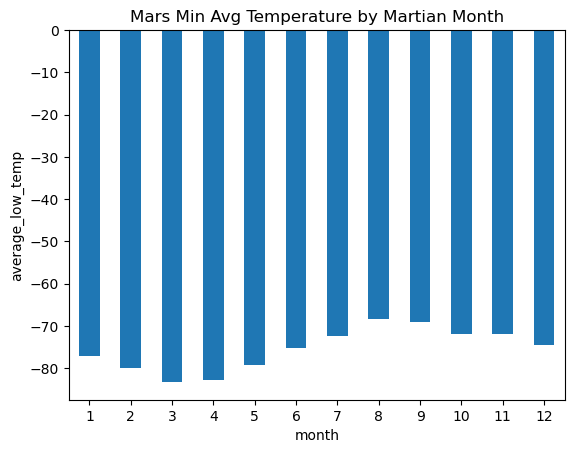

In [38]:
# Plot the average minimum temperature by month
average_low_temp.plot.bar(rot = 0)
plt.ylabel("average_low_temp")
plt.title('Mars Min Avg Temperature by Martian Month')

In [39]:
# Identify the coldest and hottest months in Curiosity's location
hottest_month = average_low_temp.idxmax()
hottest_month_temp = average_low_temp.max()

coldest_month = average_low_temp.idxmin()
coldest_month_temp = average_low_temp.min()

print(f"Month #{hottest_month} had the hottest average temperature of {hottest_month_temp}")
print(f"Month #{coldest_month} had the coldest average temperature of {coldest_month_temp}")

Month #8 had the hottest average temperature of -68.38297872340425
Month #3 had the coldest average temperature of -83.30729166666667


In [40]:
# 4. Average pressure by Martian month
avg_pressure_monthly = mars_df["pressure"].groupby(mars_df["month"]).mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Mars Avg Pressure by Martian Month')

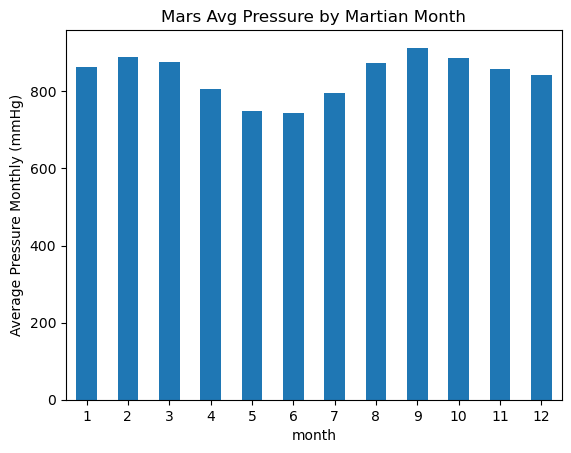

In [41]:
# Plot the average pressure by month
avg_pressure_monthly.plot.bar(rot = 0)
plt.ylabel('Average Pressure Monthly (mmHg)')
plt.title('Mars Avg Pressure by Martian Month')

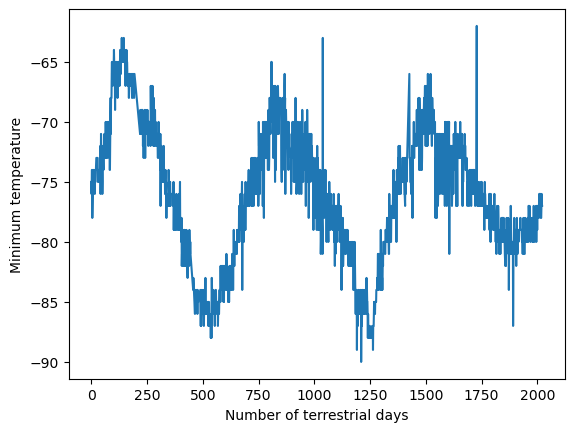

In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?

first_terra_day = mars_df['terrestrial_date'].agg('min')

# create a new df with min temps from each record and the calculated # of earth days
terra_days_min_temps_df = pd.DataFrame({
    "min_temp": mars_df['min_temp'],
    "terra_days": mars_df['terrestrial_date'] - first_terra_day
})

# plot the int value of earth days versus the min_temps for each sol record
plt.plot(terra_days_min_temps_df["terra_days"].dt.days, terra_days_min_temps_df["min_temp"])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

# use # of days between peaks to calculate approxiamte # of earth days in a martian year

On average, the third month has the coldest minimum temperature on Mars and the eighth month is the warmest. From the third month onward, there is a gradual increase in min. average temps.



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

Estimation: The distance from temperature peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. It is consistent when looking up the official number of days in Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:

# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', header=True, index=False, date_format='%Y-%m-%d')

In [45]:
browser.quit()